# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fauzan Naufal Rizqi
- **Email:** fauzannaufal714@gmail.com / m012d4ky2109@bangkit.academy
- **ID Dicoding:** fauzanznzz

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan dalam pola pemakaian sepeda antara cuaca buruk dan cuaca bagus ?
- Apakah kecepatan angin berpengaruh terhadap penyewaan sepeda ?
- Bagaimana pola penyewaan sepeda berubah sepanjang tahun 2011 dan 2012 ?
- Apakah terdapat jam dimana penyewaan sepeda lebih tinggi pada musim panas(2) dibanding musim dingin(4) ?

In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [657]:
# Gathering Data
# Load data in data folder
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [658]:
# Load data in data folder
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [659]:
# Data info
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [660]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari proses diatas, kita menemukan bahwa tipe data fitur 'dteday' belum berbentuk Datetime sehingga akan dilakukan proses perubahan nanti.

### Assessing Data

In [661]:
# Assesing Data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [662]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil describe untuk day_df maupun hour_df diatas, tidak ditemukannya kesalahan nilai, sehingga kita bisa melanjutkan ke proses assessing lainnya

In [663]:
# check for missing values
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [664]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hasil dari proses diatas menunjukkan bahwa tidak terdapat missing values pada data sehingga tidak perlu melakukan imputasi ataupun drop

In [665]:
#check for duplicates
day_df.duplicated().sum()

0

In [666]:
hour_df.duplicated().sum()

0

Hasil dari proses pengecekan duplikasi data diatas adalah day_df maupun hour_df tidak memiliki data yang duplikat

In [667]:
# For day_df
numerical_cols = [col for col in day_df.columns if col != 'dteday']  # Exclude the 'dteday' feature
for col in numerical_cols:
    q25, q75 = np.percentile(day_df[col].dropna(), 25), np.percentile(day_df[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = day_df[(day_df[col] < minimum) | (day_df[col] > maximum)]
    print(f'Outliers for {col} is {outliers.shape[0]}')

Outliers for instant is 0
Outliers for season is 0
Outliers for yr is 0
Outliers for mnth is 0
Outliers for holiday is 21
Outliers for weekday is 0
Outliers for workingday is 0
Outliers for weathersit is 0
Outliers for temp is 0
Outliers for atemp is 0
Outliers for hum is 2
Outliers for windspeed is 13
Outliers for casual is 44
Outliers for registered is 0
Outliers for cnt is 0


Terdapat outliers pada beberapa column/fitur yaitu : holiday, hum, windspeed, casual sehingga kita dapat melakukan handle terhadap outliers ini pada proses selanjutnya

In [668]:
# For hour_df
numerical_cols = [col for col in hour_df.columns if col != 'dteday']  # Exclude the 'dteday' feature
for col in numerical_cols:
    q25, q75 = np.percentile(hour_df[col].dropna(), 25), np.percentile(hour_df[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = hour_df[(hour_df[col] < minimum) | (hour_df[col] > maximum)]
    print(f'Outliers for {col} is {outliers.shape[0]}')

Outliers for instant is 0
Outliers for season is 0
Outliers for yr is 0
Outliers for mnth is 0
Outliers for hr is 0
Outliers for holiday is 500
Outliers for weekday is 0
Outliers for workingday is 0
Outliers for weathersit is 3
Outliers for temp is 0
Outliers for atemp is 0
Outliers for hum is 22
Outliers for windspeed is 342
Outliers for casual is 1192
Outliers for registered is 680
Outliers for cnt is 505


Terdapat outliers pada beberapa column/fitur yaitu : holiday, weathersit, hum, windspeed, casual, registered dan cnt sehingga kita dapat melakukan handle terhadap outliers ini pada proses selanjutnya

### Cleaning Data

In [669]:
# Cleaning Data
# Handle outliers

# For day_df

# Handle outliers
outlier_cols = ['holiday', 'hum', 'windspeed', 'casual']
for col in outlier_cols:
    q25, q75 = np.percentile(day_df[col].dropna(), 25), np.percentile(day_df[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    day_df = day_df[(day_df[col] >= minimum) & (day_df[col] <= maximum)]

In [670]:
# Check outliers for day_df again
numerical_cols = [col for col in day_df.columns if col != 'dteday']  # Exclude the 'dteday' feature
for col in numerical_cols:
    q25, q75 = np.percentile(day_df[col].dropna(), 25), np.percentile(day_df[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = day_df[(day_df[col] < minimum) | (day_df[col] > maximum)]
    print(f'Outliers for {col} is {outliers.shape[0]}')

Outliers for instant is 0
Outliers for season is 0
Outliers for yr is 0
Outliers for mnth is 0
Outliers for holiday is 0
Outliers for weekday is 0
Outliers for workingday is 0
Outliers for weathersit is 0
Outliers for temp is 0
Outliers for atemp is 0
Outliers for hum is 0
Outliers for windspeed is 2
Outliers for casual is 16
Outliers for registered is 0
Outliers for cnt is 0


In [688]:
# For hour_df

# Handle outliers

outlier_cols = ['holiday', 'weathersit', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in outlier_cols:
    q25, q75 = np.percentile(hour_df[col].dropna(), 25), np.percentile(hour_df[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    hour_df = hour_df[(hour_df[col] >= minimum) & (hour_df[col] <= maximum)]


In [689]:
# Check ouliters fo hour_df again
numerical_cols = [col for col in hour_df.columns if col != 'dteday']  # Exclude the 'dteday' feature
for col in numerical_cols:
    q25, q75 = np.percentile(hour_df[col].dropna(), 25), np.percentile(hour_df[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = hour_df[(hour_df[col] < minimum) | (hour_df[col] > maximum)]
    print(f'Outliers for {col} is {outliers.shape[0]}')

Outliers for instant is 0
Outliers for season is 0
Outliers for yr is 0
Outliers for mnth is 0
Outliers for hr is 0
Outliers for holiday is 0
Outliers for weekday is 0
Outliers for workingday is 0
Outliers for weathersit is 0
Outliers for temp is 0
Outliers for atemp is 1
Outliers for hum is 0
Outliers for windspeed is 0
Outliers for casual is 398
Outliers for registered is 84
Outliers for cnt is 0


## Exploratory Data Analysis (EDA)

Setelah melakukan Data Wrangling sebelumnya, ditemukan bahwa fitur-fitur pada day.csv dan hour.csv kurang lebih sama. Oleh karena itu dalam lanjutan analisis data berikutnya, hanya akan menggunakan hour.csv karena memiliki fitur "hour" sehingga dapat melakukan analisis dengan lebih detail terutama berkaitan dengan pertanyaan bisnis ke-4. Untuk memudahkan hour_df akan dicopy ke df

In [690]:
# change hour_df to df

df = hour_df.copy()

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13668 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     13668 non-null  int64  
 1   dteday      13668 non-null  object 
 2   season      13668 non-null  int64  
 3   yr          13668 non-null  int64  
 4   mnth        13668 non-null  int64  
 5   hr          13668 non-null  int64  
 6   holiday     13668 non-null  int64  
 7   weekday     13668 non-null  int64  
 8   workingday  13668 non-null  int64  
 9   weathersit  13668 non-null  int64  
 10  temp        13668 non-null  float64
 11  atemp       13668 non-null  float64
 12  hum         13668 non-null  float64
 13  windspeed   13668 non-null  float64
 14  casual      13668 non-null  int64  
 15  registered  13668 non-null  int64  
 16  cnt         13668 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.9+ MB


tipe dari fitur dteday belum berupa datetime, maka akan diubah pada proses dibawah

In [692]:
# change the dteday column to datetime

df['dteday'] = pd.to_datetime(df['dteday'])

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [693]:
# Data Analysis
# Describe include all

df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,13668.000000,13668,13668.000000,13668.000000,13668.000000,13668.000000,13668.0,13668.00000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000,13668.000000
mean,8310.934958,2011-12-17 08:05:22.388059648,2.468832,0.464516,6.473003,10.890108,0.0,3.01017,0.735660,1.458516,0.472293,0.454767,0.652981,0.178332,19.862818,107.235221,127.098039
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.0,0.00000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,3944.750000,2011-06-18 00:00:00,1.000000,0.000000,3.000000,4.000000,0.0,1.00000,0.000000,1.000000,0.320000,0.318200,0.510000,0.104500,3.000000,24.000000,28.000000
50%,8122.500000,2011-12-10 00:00:00,2.000000,0.000000,6.000000,10.000000,0.0,3.00000,1.000000,1.000000,0.460000,0.454500,0.660000,0.164200,11.000000,89.000000,106.000000
75%,12545.250000,2012-06-11 00:00:00,3.000000,1.000000,10.000000,17.000000,0.0,5.00000,1.000000,2.000000,0.620000,0.590900,0.810000,0.253700,31.000000,165.000000,203.000000
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,0.0,6.00000,1.000000,3.000000,0.960000,1.000000,1.000000,0.462700,85.000000,390.000000,462.000000
std,5046.391138,NaN,1.133179,0.498758,3.550687,7.270606,0.0,1.94994,0.440997,0.656450,0.188423,0.168981,0.187244,0.111838,21.636926,93.498371,108.196614


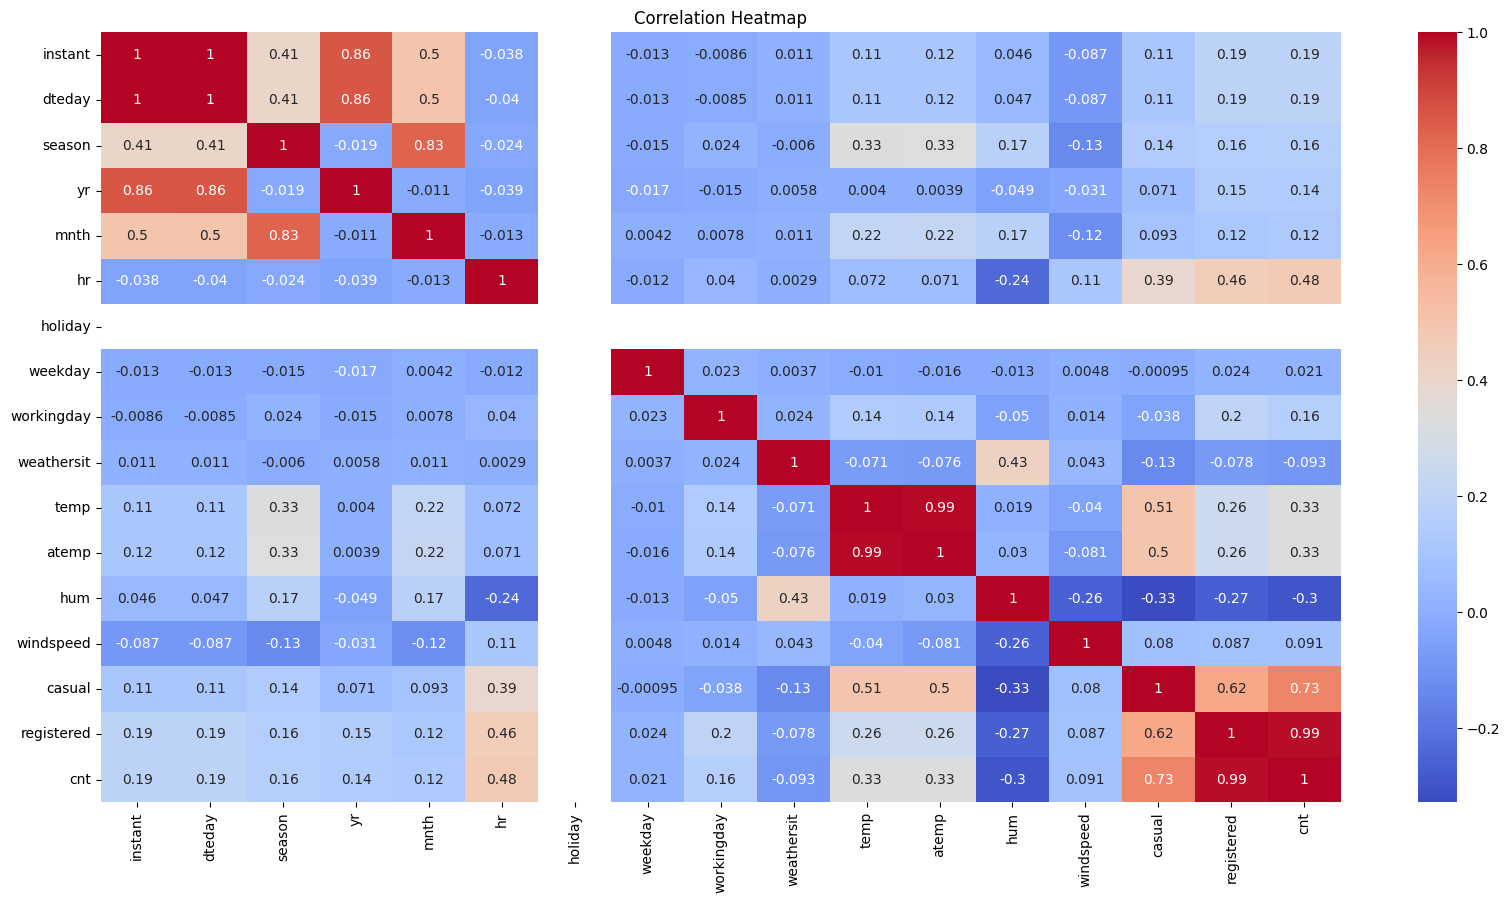

In [694]:
# Check correlation between every pair of columns
correlation = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [695]:
# Pertanyaan 1 : Apakah terdapat perbedaan dalam pola pemakaian sepeda antara cuaca buruk dan cuaca bagus ?
# groupby agg max, min, mean, median, std and sorted

df.groupby('weathersit').agg({'cnt': ['max', 'min', 'mean', 'median', 'std']}).sort_values(by=('cnt', 'mean'), ascending=False)

cnt                                   
            max min        mean median         std
weathersit                                        
1           462   1  132.093999  114.0  110.286603
2           455   1  128.239724  108.0  106.356147
3           450   1   89.024840   59.0   90.136430

Hasil diatas menunjukkan terdapat pola penyewaan/pemakaian sepeda dimana jika diurutkan berdasarkan cuaca, maka 1 (cuaca terbagus) memiliki jumlah penyewaan sepeda yang lebih banyak dan konsisten dibanding 4 (cuaca buruk), untuk lebih jelasnya dibawah line plot penyewaan sepeda berdasarkan cuaca

In [696]:
# Pertanyaan 2 :  Apakah kecepatan angin berpengaruh terhadap penyewaan sepeda ?

df['windspeed'].corr(df['cnt'])

0.09086971182904265

Hasil korelasi menunjukkah bahwa ada hubungan positif antara kecepatan angin dan jumlah penyewaan sepeda akan tetapi sangat kecil sehingga bisa disimpulkan kecepatan angin tidak terlalu berpengaruh terhadap jumlah penyewaan sepeda

In [697]:
# Pertanyaan 3 : Bagaimana pola penggunaan sepeda berubah sepanjang tahun 2011 dan 2012 ?
# yr = 0 -> 2011 and yr = 1 -> 2012
# group by month in 2011 and sorted by mean

df_2011 = df[df['yr'] == 0]
df_2011.groupby('mnth')['cnt'].mean().sort_values(ascending=False)


mnth
6     144.560345
8     142.014851
7     140.162393
5     136.008475
9     133.550000
10    123.771242
11    114.384095
12    110.962209
4     105.730318
3      83.130435
2      72.277680
1      55.834862
Name: cnt, dtype: float64

In [698]:
# group by month in 2012 and sorted by mean

df_2012 = df[df['yr'] == 1]
df_2012.groupby('mnth')['cnt'].mean().sort_values(ascending=False)

mnth
7     162.212851
10    160.850716
9     158.976190
8     157.138655
5     153.563601
11    152.903811
6     152.636555
3     140.757143
4     135.655602
12    132.102686
2     121.202361
1     111.498382
Name: cnt, dtype: float64

Dari hasil di atas terlihat bahwa rata-rata penggunaan sepeda pada 2 tahun (2011 dan 2012) cenderung lebih tinggi selama musim panas, yaitu pada sekitar bulan Mei (month=6) hingga September (month=9). Sedangkan rata-rata penggunaan sepeda cenderung lebih rendah selama musim dingin, yaitu pada sekitar bulan 12 dan seterusnya.

In [699]:
# Pertanyaan 4 : Apakah terdapat jam dimana penyewaan sepeda lebih tinggi pada musim panas(2) dibanding musim dingin(4) ?

df[(df['season'] == 2) | (df['season'] == 4)].groupby(['season', 'hr'])['cnt'].agg(['max', 'min', 'mean', 'median', 'std']).sort_values(by='mean', ascending=False)

max  min        mean  median         std
season hr                                          
4      16  447   22  281.052632   292.0   96.308579
2      19  452   45  280.072165   292.0  111.108079
       16  448   33  269.906542   290.0  100.905666
       18  453   38  263.918367   274.0  120.732631
       17  429   27  263.138889   272.0   98.388487
4      19  413   39  256.755396   253.0   90.553359
       18  423   43  254.788732   237.0   99.727617
       17  425   31  251.351852   238.0   96.081561
2      20  461   35  244.536424   252.0  104.598902
4      9   409   20  236.129630   224.5   88.921079
2      9   408   29  229.318750   217.5   82.669104
4      12  417   18  222.532258   217.0   85.103135
       13  431   22  214.008000   214.0   82.783286
       15  449   30  211.764228   214.0   80.304347
       20  434   47  206.283951   201.5   81.567521
2      12  348   38  199.058824   202.0   70.619090
       13  350   40  194.530973   202.0   70.030870
       8   421   14  191.555556   157.0  114.282236
4      7   398    7  191.465278   225.0  130.991481
       14  413   24  190.216667   186.0   72.321317
2      21  396   11  189.064327   195.0   81.116485
4      8   417   20  187.121951   138.0  128.295799
2      15  316   25  187.019417   188.0   66.223475
       7   402    7  182.741935   169.0  125.042218
4      11  423   11  182.615942   170.0   77.567613
2      14  298   15  176.690909   180.5   62.267807
4      21  360   26  164.384615   166.0   65.133197
       10  360   12  161.293333   151.0   64.747682
2      11  279   19  158.419355   161.5   60.975284
       22  321   23  145.160920   149.5   63.436168
       10  291   22  142.404412   140.0   54.970616
4      22  264   13  125.319527   121.0   50.300451
2      23  256   12   96.636872    90.0   49.881624
4      23  220   13   87.502924    80.0   42.404269
       6   194    3   83.135294    92.0   53.135079
2      6   194    2   79.653631    82.0   50.830658
       0   206    3   56.966292    41.5   40.623933
4      0   283   13   56.625731    42.0   44.404693
       1   165    4   36.375000    17.5   37.335778
2      1   130    1   35.000000    22.5   32.090828
4      2   132    1   23.940476    10.0   28.059966
2      2    98    1   23.205556    12.0   24.460822
4      5    66    1   22.823529    22.0   13.915362
2      5    45    1   19.225989    19.0   10.772165
4      3    79    1   12.035928     6.0   14.033476
2      3    66    1   11.577143     6.0   12.000170
4      4    21    1    7.347059     7.0    3.498540
2      4    23    1    6.270115     5.0    4.077504

Berdasarkan hasil di atas, terdapat jam dimana penyewaan lebih tinggi pada musim panas dibandingkan musim dingin, misalnya pada jam 17 musim panas dengan rata" yaitu 263.13 sedangkan pada jam 17 musim dingin yaitu 251.35 dan ada beberapa jam tertentu lainnya

## Visualization & Explanatory Analysis

### Pertanyaan 1:

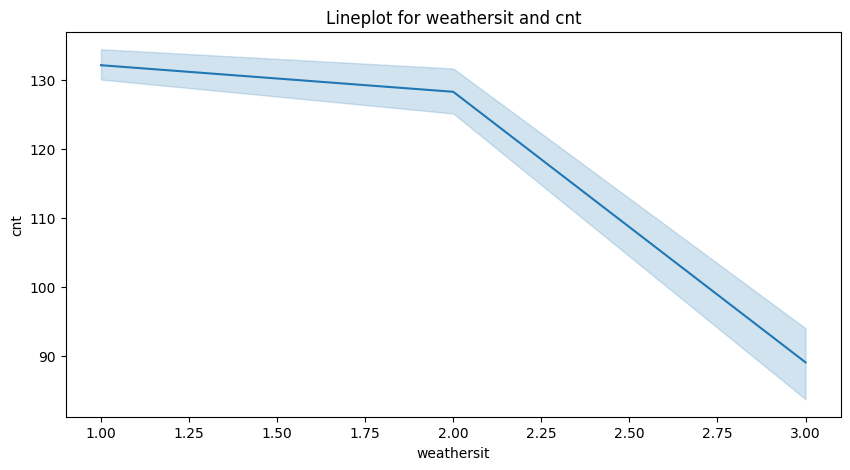

In [700]:
# Visualisasi dari pertanyaan 1

# line plot for weathersit and cnt
plt.figure(figsize=(10, 5))
sns.lineplot(x='weathersit', y='cnt', data=df)
plt.title('Lineplot for weathersit and cnt')
plt.show()

### Pertanyaan 2:

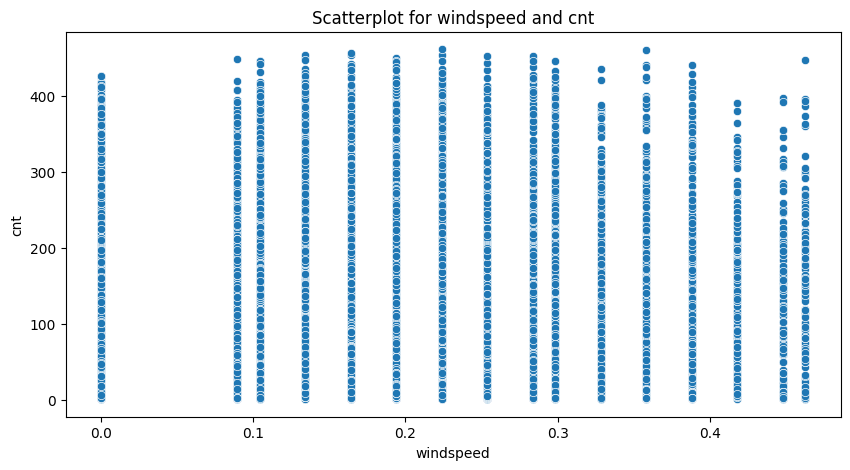

In [701]:
# Visualisasi dari pertanyaan 2
# scatter plot for windspeed and cnt
plt.figure(figsize=(10, 5))
sns.scatterplot(x='windspeed', y='cnt', data=df)
plt.title('Scatterplot for windspeed and cnt')
plt.show()

### Pertanyaan 3:

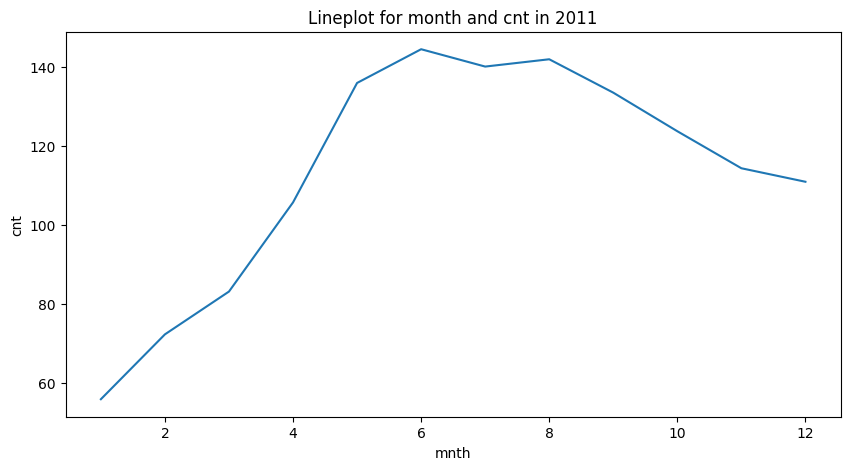

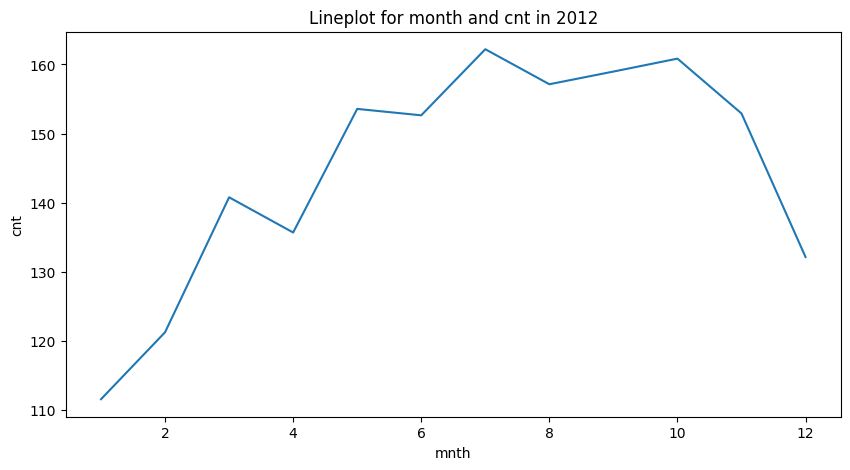

In [702]:
# Visualisasi dari pertanyaan 3

# line plot for month and cnt in 2011
plt.figure(figsize=(10, 5))
sns.lineplot(x='mnth', y='cnt', data=df_2011, ci=None)
plt.title('Lineplot for month and cnt in 2011')
plt.show()

# line plot for month and cnt in 2012
plt.figure(figsize=(10, 5))
sns.lineplot(x='mnth', y='cnt', data=df_2012, ci=None)
plt.title('Lineplot for month and cnt in 2012')
plt.show()

### Pertanyaan 4:

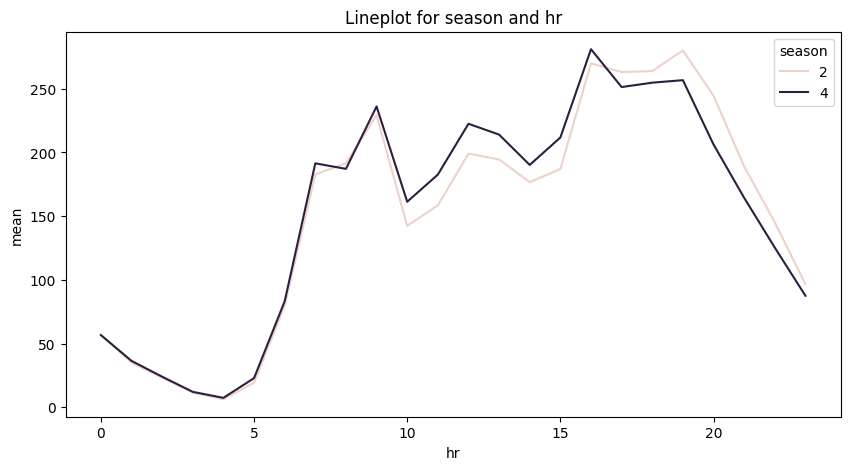

In [703]:
# Visualisasi dari pertanyaan 4

# data

summer_winter = df[(df['season'] == 2) | (df['season'] == 4)].groupby(['season', 'hr'])['cnt'].agg(['max', 'min', 'mean', 'median', 'std']).sort_values(by='mean', ascending=False)

# line plot for season and hr

plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='mean', data=summer_winter, hue='season')
plt.title('Lineplot for season and hr')
plt.show()

## Conclusion

- Conclusion pertanyaan 1 : Hasil analisis menunjukkan bahwa terdapat pola dalam penyewaan atau penggunaan sepeda berdasarkan kondisi cuaca. Cuaca yang lebih baik, seperti yang digambarkan oleh kategori cuaca 1, memiliki jumlah penyewaan sepeda yang lebih tinggi dan lebih konsisten dibandingkan dengan cuaca yang buruk, yang tercatat dalam kategori cuaca 3. Hal ini menunjukkan bahwa kebanyakan orang cenderung lebih memilih untuk menggunakan sepeda saat cuaca sedang baik daripada saat cuaca buruk.

- Conclusion pertanyaan 2 : Tidak ditemukan korelasi yang signifikan antara kecepatan angin (windspeed) dengan jumlah penyewaan sepeda. Ini menunjukkan bahwa kecepatan angin mungkin bukan faktor yang signifikan dalam menentukan jumlah penyewaan sepeda.

- Conclusion pertanyaan 3 : Pola penyewaan sepeda pada tahun 2011 dan 2012 menunjukkan adanya tren yang serupa. Kedua tahun tersebut memiliki rata-rata tertinggi dalam jumlah penyewaan sepeda selama musim panas, yang biasanya berlangsung dari bulan Mei hingga September. Sebaliknya, jumlah penyewaan cenderung menurun selama musim dingin, terutama pada bulan-bulan antara November hingga Maret. Hal ini mencerminkan pola umum penggunaan sepeda yang dipengaruhi oleh perubahan musim, dengan kondisi cuaca yang lebih hangat di musim panas cenderung mendorong lebih banyak orang untuk menggunakan sepeda, sementara cuaca yang lebih dingin dan kondisi jalan yang kurang bersahabat selama musim dingin cenderung mengurangi jumlah penyewaan sepeda."

- Conclusion pertanyaan 4 : Hasil menunjukkan bahwa terdapat jam-jam tertentu di mana penyewaan sepeda lebih tinggi pada musim panas dibandingkan dengan musim dingin. Misalnya, pada jam 17, rata-rata jumlah penyewaan sepeda pada musim panas adalah 263.13, sedangkan pada musim dingin adalah 251.35. Hal ini menunjukkan bahwa faktor musim juga dapat mempengaruhi pola penyewaan sepeda pada jam-jam tertentu.

In [704]:
# Convert df to csv file in dashboard folder

df.to_csv('dashboard/main.csv', index=False)